In [ ]:
import numpy as np
from scipy.signal import convolve2d
from imageio.v2 import imread
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline
backend_inline.set_matplotlib_formats('svg')

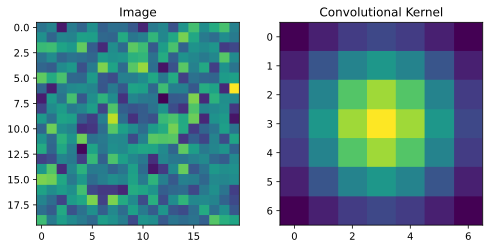

In [ ]:
imgN = 20
image = np.random.randn(imgN, imgN)

# convolution kernel
kernelN = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN))
kernel = np.exp(-(X**2+Y**2)/7)

# lets see what it looks like
fig, ax = plt.subplots(1,2, figsize = (8, 6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolutional Kernel')

plt.show()

In [ ]:
convoutput = np.zeros((imgN, imgN))
halfKr = kernelN//2

for rowi in range(halfKr, imgN-halfKr):
    for coli in range(halfKr, imgN-halfKr):

        # cut out the piece of the image
        pieceOfImg = image[rowi - halfKr:rowi + halfKr + 1, :]
        pieceOfImg = pieceOfImg[:, coli-halfKr:coli+halfKr + 1]

        # dot product : element wise multiply and sum
        dotprod = np.sum(pieceOfImg*kernel[::-1, ::-1])

        # store the result this pixel
        convoutput[rowi, coli] = dotprod

In [ ]:
convoutput2 = convolve2d(image, kernel, mode = 'valid')

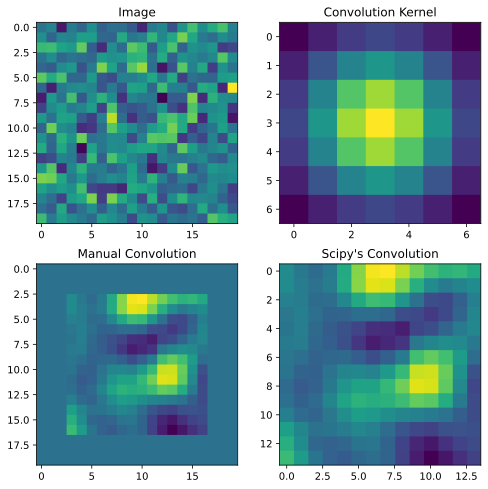

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (8,8))

ax[0, 0].imshow(image)
ax[0, 0].set_title('Image')

ax[0, 1].imshow(kernel)
ax[0, 1].set_title('Convolution Kernel')

ax[1, 0].imshow(convoutput)
ax[1,0].set_title('Manual Convolution')

ax[1, 1].imshow(convoutput2)
ax[1, 1].set_title("Scipy's Convolution")

plt.show()

(1675, 3000, 3)
(1675, 3000)


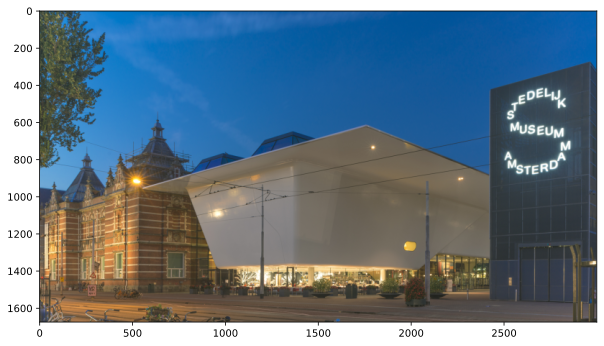

In [ ]:
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

print(bathtub.shape)

fig = plt.figure(figsize = (10, 6))
plt.imshow(bathtub)

# transforming it to 2d
bathtub = np.mean(bathtub, axis = 2)
bathtub = bathtub/np.max(bathtub)

print(bathtub.shape)

In [ ]:
# vertical kernel
VK = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])
HK = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1,-1,-1]])

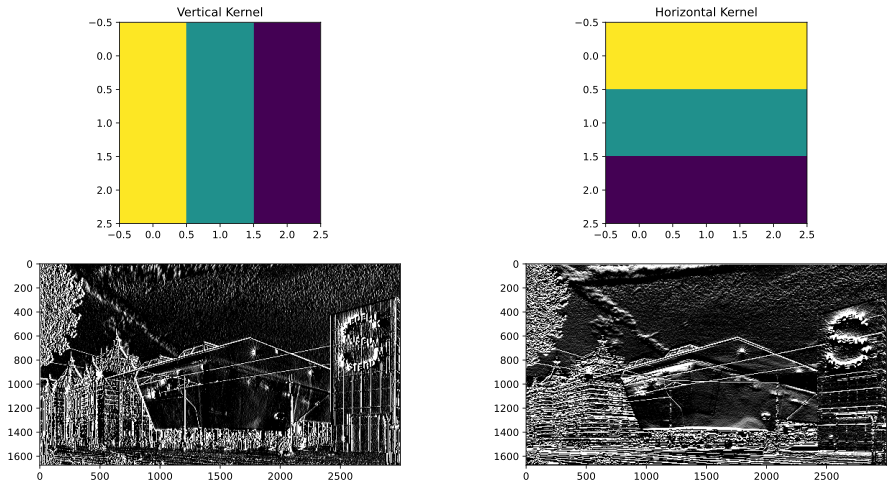

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8))

ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical Kernel')

ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal Kernel')

convres = convolve2d(bathtub, VK, mode = 'same')
ax[1, 0].imshow(convres, cmap = 'gray', vmin = 0, vmax = .01)

convres = convolve2d(bathtub, HK, mode = 'same')
ax[1, 1].imshow(convres, cmap = 'gray', vmin = 0, vmax = .01)

plt.show()


In [ ]:
# now in pytorch
import torch
import torch.nn.functional as F
VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()
bathtub_t = torch.tensor(bathtub).view(1, 1, bathtub.shape[0],bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [ ]:
C = F.conv2d(bathtub_t, VK_t)
H = F.conv2d(bathtub_t, HK_t)
print(C.shape)

torch.Size([1, 1, 1673, 2998])


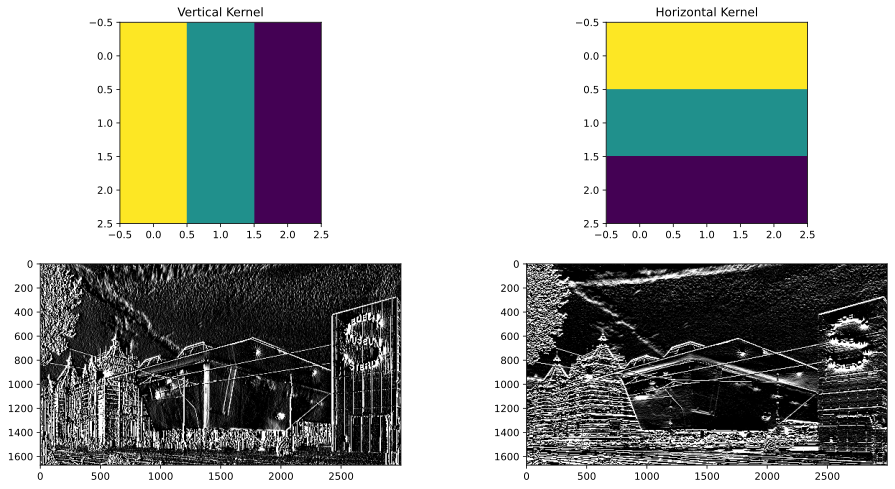

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8))

ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical Kernel')

ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal Kernel')

img = torch.squeeze(C.detach())
ax[1, 0].imshow(img, cmap = 'gray', vmin = 0, vmax = .01)
img = torch.squeeze(H.detach())
ax[1, 1].imshow(img, cmap = 'gray', vmin = 0, vmax = .01)

plt.show()